### **HR Analytics Project- Understanding the Attrition in HR**


Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics**

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

**Attrition in HR**

Attrition in human resources refers to the **gradual loss of employees overtime**. In general, **relatively high attrition is problematic** for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import power_transform

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
lg = LogisticRegression()

lr = LinearRegression()

from sklearn.svm import SVC
svc = SVC()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')


https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [2]:
url = 'https://raw.githubusercontent.com/MrTanbirSingh/csvfiles/main/HR-Employee-Attrition.csv'
df = pd.read_csv(url)

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### Faming Problem

This is a suvervised classification problem with continous data.</br>
**Target column is Perforance of the employee which means gradual loss in employess overtime**


### Understanding Data

#### Size of the data 

In [4]:
df.shape

(1470, 35)

#### How does the data look like

In [5]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
71,29,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,...,4,80,1,6,3,3,5,4,0,4
778,46,No,Travel_Rarely,1003,Research & Development,8,4,Life Sciences,1,1080,...,1,80,3,19,2,3,16,13,1,7
880,32,No,Travel_Frequently,116,Research & Development,13,3,Other,1,1234,...,3,80,1,2,2,3,2,2,2,2
261,38,No,Non-Travel,1327,Sales,2,2,Life Sciences,1,361,...,4,80,1,13,0,3,8,7,7,5
882,36,No,Travel_Rarely,363,Research & Development,1,3,Technical Degree,1,1237,...,3,80,1,17,2,3,7,7,7,7


#### Data type of columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There some columns with categorical data which we may need to encode.

#### Checking null values

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Null values are not present in this dataset

#### How does data look like mathematically

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


This data need to be scale. Average people in this dataset is 36 earning 802.48 daily rates and hourly rates are 65.89. Years spent in the same role is 4.2 

#### Checking Duplicate values

In [9]:
df.duplicated().sum()

0

#### Correlation between columns

In [10]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


#### Encoding the data

ATTRITION column is of categorical type.</br>
To check the correlation with ATTRITION need to change it to numerical data which can be achieved with encoding of this data using LabelEncoder from sklearn.

In [11]:
#checking which column is of object type
categorical_data = [i for i in df.columns.values if df[i].dtype == df['Gender'].dtype]
categorical_data

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

Encoding all the columns.

In [12]:
for col_name in categorical_data:
  df.insert(df.columns.get_loc(col_name)+1, column= 'LE_'+col_name, value=le.fit_transform(df[col_name]))

In [13]:
df.sample(5)

,Age,Attrition,LE_Attrition,BusinessTravel,LE_BusinessTravel,DailyRate,Department,LE_Department,DistanceFromHome,Education,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,44,No,0,Travel_Rarely,2,477,Research & Development,1,7,4,...,4,80,1,24,4,3,22,6,5,17
25,53,No,0,Travel_Rarely,2,1282,Research & Development,1,5,3,...,4,80,1,26,3,2,14,13,4,8
478,25,No,0,Travel_Rarely,2,622,Sales,2,13,1,...,3,80,0,7,1,3,7,4,0,6
229,29,Yes,1,Travel_Rarely,2,896,Research & Development,1,18,1,...,3,80,0,4,3,2,4,3,0,1
521,27,No,0,Travel_Frequently,1,1410,Sales,2,3,1,...,2,80,2,6,3,3,6,5,0,4


### EDA: Exploratory Data Analysis

Analysis on categorical data

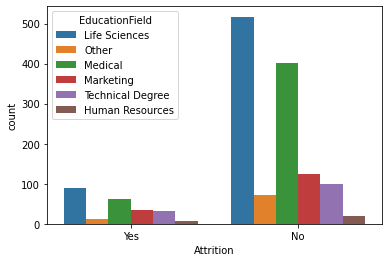

In [14]:
sns.countplot(df.Attrition,hue= df['EducationField'])

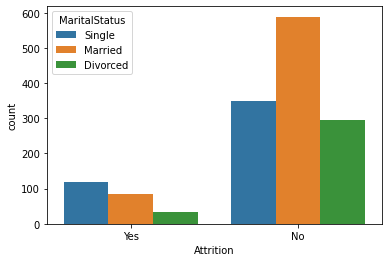

In [15]:
sns.countplot(df.Attrition,hue= df.MaritalStatus)

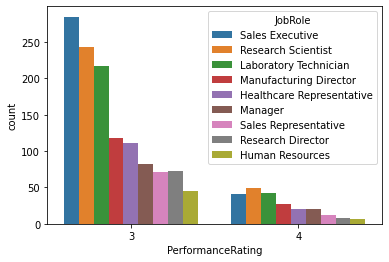

In [46]:
sns.countplot(df.PerformanceRating, hue= df.JobRole)

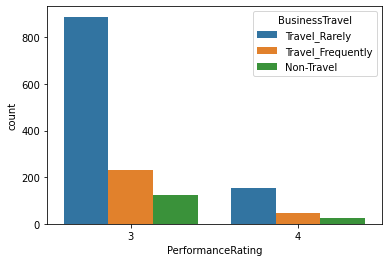

In [45]:
sns.countplot(df.PerformanceRating,hue = df.BusinessTravel)

In [39]:
df.PerformanceRating.unique()

array([3, 4])

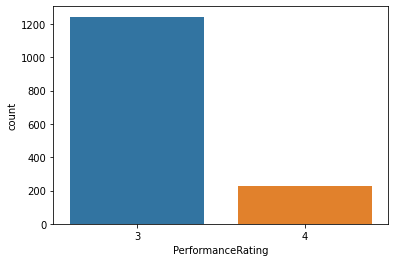

In [44]:
sns.countplot(df.PerformanceRating)

In [37]:
pd.crosstab(df['BusinessTravel'],df.PerformanceRating)

PerformanceRating,3,4
BusinessTravel,,
Non-Travel,124,26
Travel_Frequently,231,46
Travel_Rarely,889,154


In [41]:
#Percentage of people comes under Attrition based on BusinessTravel
print(f"Travel_Rarely: {100-(887-156)/887*100}%\nTravel_Frequently: {100-(208-69)/208*100}%\nNon-Travel: {100-(138-12)/138*100}%")

In [ ]:
#No of people who comes under the attrition with certain JobRole.
pd.crosstab(df.JobRole, df.Attrition)

Among all the job roles: **Laboratory Technician, Sales Executive** and **Research Scientist** have more attrition than the other job roles.

In [21]:
#percentage of attiration based on the Job Roles 
print('Sales Executive: ',100-(326-57)/326*100) 
print('Research Scientist: ',100-(292-47)/292*100)
print('Laboratory Technician:',100-(259-62)/259*100)
print('Manufacturing Director: ',100-(145-10)/145*100)
print('Sales Representative: ',100-(83-33)/83*100)
print('Human Resources: ',100-(52-12)/52*100)

Sales Executive:  17.484662576687114
Research Scientist:  16.0958904109589
Laboratory Technician: 23.938223938223928
Manufacturing Director:  6.896551724137936
Sales Representative:  39.75903614457831
Human Resources:  23.076923076923066


Sales Representative: **39.7%** and Laboratory Technician: **23.9%** have the highest number of Attiration among other job profiles

In [22]:
#checking which column is of object type
numeric_columns = [i for i in df.columns.values if df[i].dtype != df['Gender'].dtype]
numeric_columns

['Age',
 'LE_Attrition',
 'LE_BusinessTravel',
 'DailyRate',
 'LE_Department',
 'DistanceFromHome',
 'Education',
 'LE_EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'LE_Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'LE_JobRole',
 'JobSatisfaction',
 'LE_MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'LE_Over18',
 'LE_OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### Splitting Data

In [101]:
df_new = df[numeric_columns]

x = df_new.drop('PerformanceRating', axis=1)
y = df_new[['PerformanceRating']]

In [48]:
# x.skew().sort_values(ascending = False)
x.sample(5)

,Age,LE_Attrition,LE_BusinessTravel,DailyRate,LE_Department,DistanceFromHome,Education,LE_EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
116,34,0,2,1354,1,5,3,3,1,153,...,4,80,0,14,6,3,11,10,5,8
1106,30,1,2,740,2,1,3,1,1,1562,...,4,80,1,10,4,3,10,8,6,7
419,30,0,0,1400,1,3,3,1,1,562,...,3,80,1,9,3,1,5,3,1,4
346,41,0,2,483,1,6,3,3,1,466,...,4,80,0,8,3,3,5,4,1,2
559,38,0,2,268,1,2,5,3,1,773,...,2,80,1,6,0,1,1,0,0,1


In [52]:
max = 0
for i in range(20,500):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = i)
  lg.fit(X_train, y_train)
  pred = lg.predict(X_test)
  acc = accuracy_score(y_test, pred)
  if acc > max:
    max = acc
    rs = i
print(max*100,'\nrs: ',rs)

100.0 
rs:  92


In [53]:
print(confusion_matrix(y_test, pred))

[[240   3]
 [  4  47]]


In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.98      0.99      0.99       243
           4       0.94      0.92      0.93        51

    accuracy                           0.98       294
   macro avg       0.96      0.95      0.96       294
weighted avg       0.98      0.98      0.98       294



### Removing Skewness

Removing skewness and checking if it improves the performance.

In [77]:
x = pd.DataFrame(power_transform(x),columns = x.columns)
# x.skew().sort_values(ascending = False)

In [78]:
max = 0
for i in range(20,1000):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = i)
  lg.fit(X_train, y_train)
  pred = lg.predict(X_test)
  acc = accuracy_score(y_test, pred)
  if acc > max:
    max = acc
    rs = i
print(max*100,'\nrs: ',rs)

100.0 
rs:  34


In [111]:
print(pred)
print(y_test)

[3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 3 3 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3
 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 4 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 4 3
 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3
 4 3 4 3 4 3 3 3 3 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 3 3 3 4
 3 3 3 3 4 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3
 3 4 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 3 3 3 3]
      PerformanceRating
1237                  3
1345                  3
1174                  3
760                   3
139                   3
...                 ...
88                    3
400                   3
510                   3
913                   3
926                   3

[294 rows x 1 columns]


In [79]:
print(confusion_matrix(y_test, pred))

[[252   3]
 [  0  39]]


In [80]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       1.00      0.99      0.99       255
           4       0.93      1.00      0.96        39

    accuracy                           0.99       294
   macro avg       0.96      0.99      0.98       294
weighted avg       0.99      0.99      0.99       294



In [81]:
from sklearn.model_selection import cross_val_score
lgc = accuracy_score(y_test, pred)

In [82]:
lsscore = cross_val_score(lg, x, y, cv=4)
print('Accuracy Score: ',lgc)
print('Cross Validation Score: ',lsscore.mean())

Accuracy Score:  0.9897959183673469
Cross Validation Score:  0.9925160674090747


### Feature extraction

In [100]:
X = x.drop(['LE_Over18','EmployeeCount'],axis = 1)
X

,Age,LE_Attrition,LE_BusinessTravel,DailyRate,LE_Department,DistanceFromHome,Education,LE_EducationField,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.525276,2.280906,0.639724,0.741049,1.333688,-1.484085,-0.920702,-0.960469,-0.748720,1.387944,...,-1.452868,0.0,-1.089987,-0.241086,-2.674702,-2.074678,0.134153,0.191631,-1.123147,0.477725
1,1.273255,-0.438422,-1.536575,-1.296373,-0.435277,0.235213,-1.714680,-0.960469,0.131368,-0.245327,...,1.282738,0.0,0.554568,0.055971,0.235282,0.256932,0.760799,0.882229,0.169501,0.908475
2,0.106709,2.280906,0.639724,1.403868,-0.435277,-1.030258,-0.920702,1.247065,1.264629,1.288336,...,-0.739382,0.0,-1.089987,-0.407747,0.235282,0.256932,-2.210451,-1.576250,-1.123147,-1.528294
3,-0.350026,-0.438422,-1.536575,1.450174,-0.435277,-0.704339,1.092874,-0.960469,1.264629,-0.488146,...,0.154425,0.0,-1.089987,-0.241086,0.235282,0.256932,0.478381,0.882229,0.922549,-1.528294
4,-1.125352,-0.438422,0.639724,-0.505259,-0.435277,-1.030258,-1.714680,0.697849,-1.438913,-1.268813,...,1.282738,0.0,0.554568,-0.590042,0.235282,0.256932,-0.951587,-0.458083,0.654122,-0.421348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.003595,-0.438422,-1.536575,0.206664,-0.435277,1.415513,-0.920702,0.697849,0.131368,-1.219491,...,0.154425,0.0,0.554568,0.860445,0.235282,0.256932,-0.071773,-0.458083,-1.123147,-0.070803
1466,0.320294,-0.438422,0.639724,-0.451764,-0.435277,-0.059665,-1.714680,0.697849,1.264629,-1.170273,...,-1.452868,0.0,0.554568,-0.087212,1.586512,0.256932,0.315743,0.882229,0.169501,0.908475
1467,-1.125352,-0.438422,0.639724,-1.651355,-0.435277,-0.449085,0.009405,-0.960469,-0.748720,1.039324,...,-0.739382,0.0,0.554568,-0.590042,-2.674702,0.256932,0.134153,-0.458083,-1.123147,-0.070803
1468,1.273255,-0.438422,-1.536575,0.547308,1.333688,-1.030258,0.009405,0.697849,1.264629,-0.147918,...,1.282738,0.0,-1.089987,0.860445,0.235282,-1.101017,0.625824,0.676430,-1.123147,1.095302


In [106]:
max = 0
for i in range(20,1000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)
  lg.fit(X_train, y_train)
  pred_x = lg.predict(X_test)
  acc_x = accuracy_score(y_test, pred)
  if acc > max:
    max = acc
    rs = i
print(max*100,'\nrs: ',rs)

98.9795918367347 
rs:  20


In [107]:
print(confusion_matrix(y_test, pred_x))

[[252   3]
 [  0  39]]


In [108]:
print(classification_report(y_test, pred_x))

              precision    recall  f1-score   support

           3       1.00      0.99      0.99       255
           4       0.93      1.00      0.96        39

    accuracy                           0.99       294
   macro avg       0.96      0.99      0.98       294
weighted avg       0.99      0.99      0.99       294



In [109]:
lsscore = cross_val_score(lg, x, y, cv=4)
print('Accuracy Score: ',lgc)
print('Cross Validation Score: ',lsscore.mean())

Accuracy Score:  0.9897959183673469
Cross Validation Score:  0.9693960283141809


Extracting features reduced the performance of the model.

### Saving the model.

In [110]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(lr, 'baseball.obj')
pickle.dump(lr,open('baseball.pkl','wb'))